# Lecture 1

## Imports

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Import Wine Dataset

In [2]:
# Mac
#folder = "/Users/Dylan/Desktop/School Stuff/Master's year/Spring 2021/STA 208/DavisSML/data/"
# Windows
folder = "C:/Users/Dylan/Documents/Spring 2021/STA 208/DavisSML/data/"
filename = folder + "winequality-red.csv"
print("Filename: ", filename)

Filename:  C:/Users/Dylan/Documents/Spring 2021/STA 208/DavisSML/data/winequality-red.csv


In [3]:
with open(filename, "r") as winefile:
    head = winefile.readline()
    winelist = [line.strip().split(";") for line in winefile]

In [4]:
wine_array = np.array(winelist, dtype=np.float32)

In [5]:
y = wine_array[:, -1]
x = wine_array[:,:-1]
n,p = x.shape

In [6]:
# Need to define an intercept for the ordinary least squares model (OLS)
X = np.hstack((np.ones((n,1)), x))
wine_ols = sm.OLS(y, X)
wine_res = wine_ols.fit()

## Evaluate the Fit of our Linear Regression

In [7]:
wine_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Wed, 31 Mar 2021   Prob (F-statistic):          1.79e-145
Time:                        09:48:01   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.9645     21.195      1.036      0.300     -19.608      63.537
x1             0.0250      0.026      0.963      0.336      -0.026       0.076
x2            -1.0836      0.121     -8.948      0.000      -1.321      -0.846
x3            -0.1826      0.147     -1.240      0.215      -0.471       0.106
x4             0.0163      0.015      1.089      0.277      -0.013       0.046
x5            -1.8742      0.419     -4.470      0.000      -2.697      -1.052
x6             0.0044      0.002      2.009      0.045       0.000       0.009
x7            -0.0033      0.001     -4.480      0.000      -0.005      -0.002
x8           -17.8805     21.633     -0.827      0.409     -60.313      24.552
x9            -0.4137      0.192     -2.159      0.031      -0.789      -0.038
x10            0.9163      0.114      8.014      0.000       0.692       1.141
x11            0.2762      0.026     10.429      0.000       0.224       0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Exercise 1.1

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

In [12]:
# Training a linear regression model on our train datasets
n_train, p_train = X_train.shape

# Use Sklearn LinearRegression
reg = LinearRegression().fit(X_train, y_train)

y_predict = reg.predict(X_test)

# Compute the mse between the predicted output and the ground truth 
# First check if y_predict and y_test are the same size
if y_predict.size == y_test.size:
    #print("Predicted values and ground truth have the same size!")
    #print("Size: ", y_predict.size)
    pass
else:
    print("Predicted values and ground truth are different sizes :(")
    print("y_predict size: ", y_predict.size)
    print("y_test size: ", y_test.size)
    
# Calculate the mse
mse = np.sum((y_predict - y_test)**2)/y_predict.size
print("Average Mse is ", mse)
print("y_test variance: ", y_test.var())
print("y_mean: ", y_test.mean())

Average Mse is  0.4143471527099609
y_test variance:  0.6360938
y_mean:  5.6375


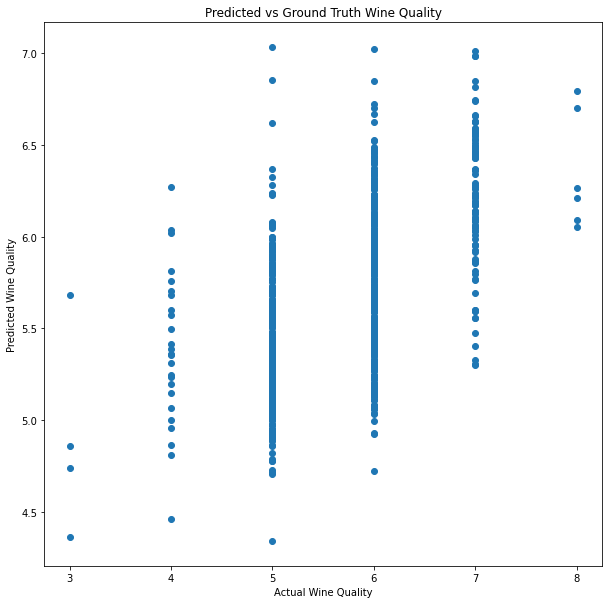

In [18]:
# Plotting our Predicted values vs the ground truth
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_predict)
plt.title("Predicted vs Ground Truth Wine Quality")
plt.ylabel("Predicted Wine Quality")
plt.xlabel("Actual Wine Quality")
plt.show()

## Using Pandas!

In [13]:
# Read our data into a pandas dataframe

# OECD Dataset
oecd_bli = pd.read_csv(folder + "oecd_bli_2015.csv", thousands=",")
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli_non_pivot = oecd_bli.copy()
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")


# GDP Per Capita Dataset
gdp_per_capita = pd.read_csv(folder + "gdp_per_capita.csv", thousands=",", 
                             delimiter="\t", encoding="latin1", na_values="N/A")
gdp_per_capita = gdp_per_capita.rename(columns={"2015": "GDP per capita"})
gdp_per_capita = gdp_per_capita.set_index("Country")

# Merge the datasets together
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats = full_country_stats.sort_values(by="GDP per capita")

In [11]:
# Display the head of our dataset
full_country_stats.head()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0
